### Convolution Neural Network

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import models, layers, losses

In [24]:
ds, ds_info = tfds.load('mnist', shuffle_files=True, as_supervised=True, with_info=True)

In [25]:
train_ds, test_ds = ds['train'], ds['test']

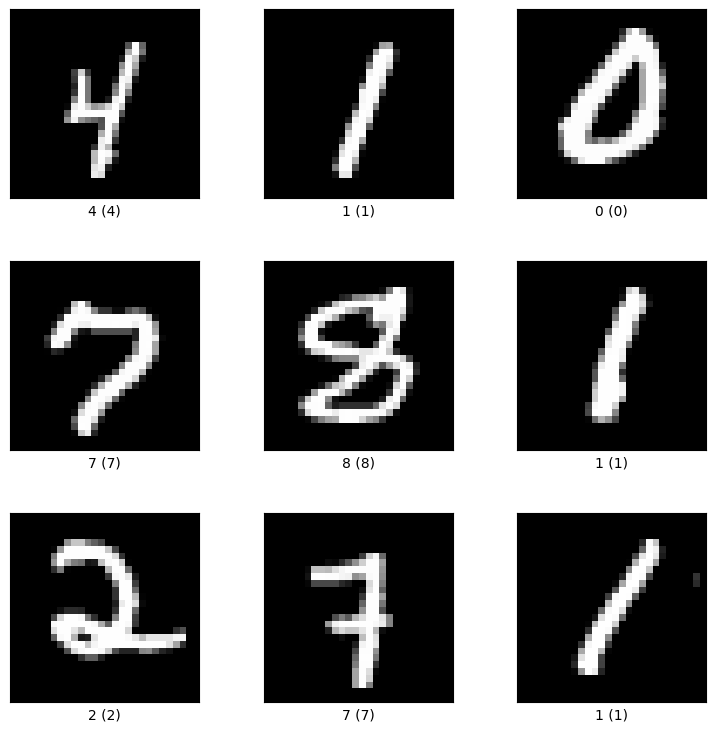

In [26]:
fig = tfds.show_examples(train_ds, ds_info)

In [27]:
# Change the data type to integer
train_ds = train_ds.map(
    lambda image,label : (tf.cast(image, dtype = tf.int32), tf.cast(label, dtype=tf.int32))
)
test_ds = test_ds.map(
    lambda image,label : (tf.cast(image, dtype = tf.int32), tf.cast(label, dtype=tf.int32))
)

In [28]:
#Normalizes the image pixels between 0 and 1
train_ds = train_ds.map(
    lambda image, label : (image/255, label)
)
test_ds = test_ds.map(
    lambda image, label : (image/255, label)
)

In [29]:
train_ds = train_ds.cache().batch(16).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [35]:
for image,label in train_ds.take(1):
    print(image.shape)

(16, 28, 28, 1)


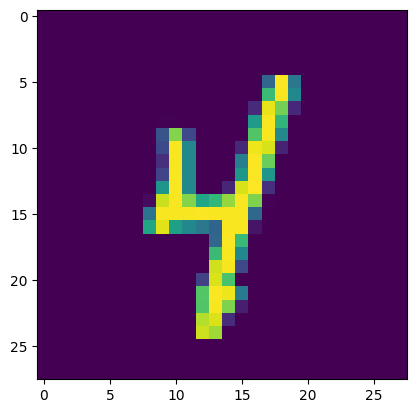

tf.Tensor(4, shape=(), dtype=int32)


In [37]:
for image_batch, label_batch in train_ds.take(1):
    image = image_batch[0]
    plt.imshow(image.numpy())
    plt.show()
    print(label_batch[0])

In [38]:
# Build the CNN architecture

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

c:\Users\AS20505657\OneDrive - Rizing LLC\Documents\Ashish Docs\Personal\Learning\Algorithm\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.add(layers.Dense(576, activation='relu'))
model.add(layers.Dense(10))

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 576)            │       332,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,418 (1.38 MB)

 Trainable params: 361,418 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# train the model
model.compile(optimizer='adam', 
              loss=losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [43]:
history = model.fit(train_ds, validation_data= test_ds, epochs= 10)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9239 - loss: 0.2424 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9854 - loss: 0.0512 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9899 - loss: 0.0345 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9922 - loss: 0.0263 - val_accuracy: 0.9891 - val_loss: 0.0450
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9875 - val_loss: 0.0520
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9897 - val_loss: 0.0369
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9911 - val_loss: 0.0373
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9957 - loss: 0

In [44]:
test_loss, test_accuracy = model.evaluate(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0654


In [45]:
print('test loss : {}'.format(test_loss))
print('test accuracy : {}'.format(test_accuracy))

test loss : 0.07024449110031128
test accuracy : 0.9879999756813049


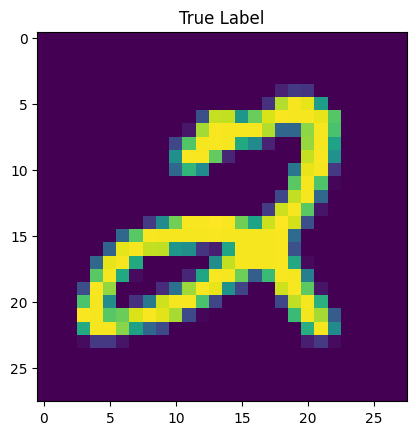

(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[-37.622196 -21.566124  35.307133 -20.265371 -20.913095 -34.69046
  -35.526978 -21.56317  -22.666246 -31.597525]]
Predicted class is : [2]


In [49]:
for image_batch, label_batch in test_ds.take(1):
    image = image_batch[0]
    true_label = label_batch[0]

    #Display the test image
    plt.imshow(image.numpy())
    plt.title('True Label')
    plt.show()


    #Prepare the image for prediction
    input_image = np.expand_dims(image, axis=0)
    print(input_image.shape)

    # Predict the class for the input image
    prediction = model.predict(input_image)
    print(prediction)
    predicted_class = np.argmax(prediction, axis=1)

    print('Predicted class is : {}'.format(predicted_class))